## link: https://www.kaggle.com/t/59c93ca0e8ae47999f9287a5751d6402

In [1]:
#folder ="../../../Downloads/Counting People/vidf-cvpr/"
folder ="./mall_dataset/"

#folder = "../../../Downloads/UCFCrowdCountingDataset_CVPR13/UCF_CC_50/"

In [36]:
!ls ../../../Downloads/mall_dataset/

demo.m	frames	mall_feat.mat  mall_gt.mat  perspective_roi.mat  readme.txt


In [2]:
import scipy.io


In [3]:
mat = scipy.io.loadmat(folder+'vidf1_33_000_count_roi_mainwalkway.mat')

IOError: [Errno 2] No such file or directory: '../../../Downloads/UCFCrowdCountingDataset_CVPR13/UCF_CC_50/vidf1_33_000_count_roi_mainwalkway.mat'

In [5]:
archivo = "mall_gt.mat" #"2_ann.mat" #"mall_gt.mat"
mat = scipy.io.loadmat(folder+archivo)
y = mat["count"]
y

array([[29],
       [30],
       [35],
       ...,
       [25],
       [26],
       [26]], dtype=uint8)

In [15]:
position = mat["frame"]
position.shape

(1, 2000)

In [6]:
images = []
for i in range(1,50+1):
    images.append(folder+"%d.jpg"%i)
images[:10]

['./mall_dataset/1.jpg',
 './mall_dataset/2.jpg',
 './mall_dataset/3.jpg',
 './mall_dataset/4.jpg',
 './mall_dataset/5.jpg',
 './mall_dataset/6.jpg',
 './mall_dataset/7.jpg',
 './mall_dataset/8.jpg',
 './mall_dataset/9.jpg',
 './mall_dataset/10.jpg']

In [7]:
images = []
for i in range(1,y.shape[0]+1):
    images.append(folder+"frames/seq_%06d.jpg"%i)
images[:10]

['./mall_dataset/frames/seq_000001.jpg',
 './mall_dataset/frames/seq_000002.jpg',
 './mall_dataset/frames/seq_000003.jpg',
 './mall_dataset/frames/seq_000004.jpg',
 './mall_dataset/frames/seq_000005.jpg',
 './mall_dataset/frames/seq_000006.jpg',
 './mall_dataset/frames/seq_000007.jpg',
 './mall_dataset/frames/seq_000008.jpg',
 './mall_dataset/frames/seq_000009.jpg',
 './mall_dataset/frames/seq_000010.jpg']

In [8]:
from PIL import Image
X = []
for image in images:
    img = Image.open(image)
    X.append(np.asarray(img))
    img.close()
X = np.asarray(X)
X.shape

(2000, 480, 640, 3)

In [41]:
#train test split and save it

idx_test = np.random.choice(np.arange(len(y)), 400, replace=False)
mask_test = np.zeros(len(y),dtype=bool) 
mask_test[idx_test] = True 

X_test = X[mask_test]
X_train = X[~mask_test]

y_test = y[mask_test]
y_train = y[~mask_test]

print(X_train.shape)
print(X_test.shape)

(1600, 480, 640, 3)
(400, 480, 640, 3)


In [70]:
y_train

array([[29],
       [30],
       [31],
       ...,
       [25],
       [26],
       [26]], dtype=uint8)

In [29]:
y_test[:,0].shape

(400,)

In [43]:
y_test_csv = np.vstack((np.arange(1,1+len(y_test)),y_test[:,0])).T
y_test_csv

array([[  1,  35],
       [  2,  41],
       [  3,  41],
       [  4,  44],
       [  5,  41],
       [  6,  41],
       [  7,  35],
       [  8,  36],
       [  9,  27],
       [ 10,  24],
       [ 11,  16],
       [ 12,  22],
       [ 13,  23],
       [ 14,  25],
       [ 15,  15],
       [ 16,  16],
       [ 17,  15],
       [ 18,  25],
       [ 19,  31],
       [ 20,  25],
       [ 21,  24],
       [ 22,  26],
       [ 23,  23],
       [ 24,  23],
       [ 25,  22],
       [ 26,  23],
       [ 27,  21],
       [ 28,  23],
       [ 29,  26],
       [ 30,  27],
       [ 31,  23],
       [ 32,  22],
       [ 33,  21],
       [ 34,  19],
       [ 35,  19],
       [ 36,  23],
       [ 37,  25],
       [ 38,  25],
       [ 39,  27],
       [ 40,  25],
       [ 41,  24],
       [ 42,  21],
       [ 43,  20],
       [ 44,  20],
       [ 45,  24],
       [ 46,  22],
       [ 47,  21],
       [ 48,  18],
       [ 49,  28],
       [ 50,  25],
       [ 51,  19],
       [ 52,  15],
       [ 53,

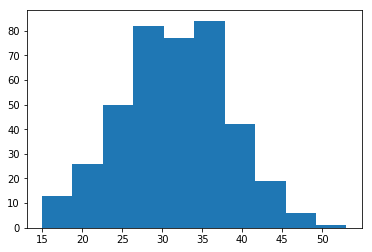

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_test)
plt.show()

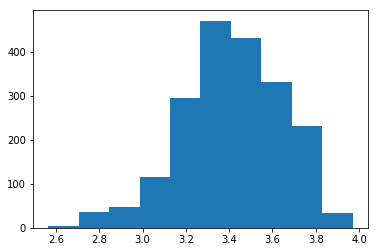

In [15]:
plt.hist(np.log(y))
plt.show()

In [18]:
aux = np.random.randint(10,60,2000)
from sklearn.metrics import mean_squared_error,mean_squared_log_error
np.sqrt(mean_squared_error(aux,y))

16.348792004304173

In [17]:
mean_squared_log_error(aux,y)

0.28246140713258866

In [69]:
import shutil

i_test = 1
i_train = 401
for i,image in enumerate(images):
    if mask_test[i]:
        shutil.copy2(image, folder+"frames_test/seq_%06d.jpg"%i_test)
        i_test+=1
    else:
        shutil.copy2(image, folder+"frames_train/seq_%06d.jpg"%i_train)
        i_train+=1


In [39]:
image

'./mall_dataset/frames/seq_002000.jpg'

In [44]:
##save it
#Save an array to a binary file in NumPy .npy format.
np.save('images_test',X_test)
np.save('images_train',X_train)
np.save('labels_train',y_train)

np.savetxt('labels_test.csv',y_test_csv)


In [60]:
y_train[:,0].shape

(1600,)

In [2]:
import pandas as pd
df = pd.read_csv("sample_submision.csv")
import numpy as np
aux = np.random.randint(10,60,df.shape[0])
df.head()


,id,count
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [3]:
import pandas as pd
d = {'id': df["id"], 'count': aux}#y_test[:,0]}

entrega = pd.DataFrame(data=d,columns=['id','count'])
#redondear a entero
entrega.head()

entrega.to_csv('submision_random.csv', index=False)

In [53]:
df = pd.read_csv("derived.csv")
df.head()

,id,count,Usage
0,1,35,Public
1,2,41,Public
2,3,41,Private
3,4,44,Public
4,5,41,Public


In [4]:
import numpy as np
aux = np.load('images_train.npy')
aux.shape

(1600, 480, 640, 3)

In [31]:
aux

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[156, 122,  97],
         [155, 121,  96],
         [155, 121,  96],
         ...,
         [204, 157, 113],
         [207, 160, 116],
         [208, 161, 117]],

        [[154, 120,  95],
         [153, 119,  94],
         [153, 119,  94],
         ...,
         [188, 141,  97],
         [192, 145, 101],
         [195, 148, 104]],

        [[154, 120,  95],
         [154, 120,  95],
         [154, 120,  95],
         ...,
         [176, 129,  85],
        

In [14]:
from PIL import Image
img = Image.open(images[0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

In [2]:
import pandas as pd
label_names = ["No","Yes"]
df_train = pd.read_csv(folder+"/train_images.csv",header=None)
df_test = pd.read_csv(folder+"/test_images.csv",header=None)
print("Shapes training: ",df_train.shape)
print("Shapes test: ",df_test.shape)
df_test.head()

('Shapes training: ', (7000, 12100))
('Shapes test: ', (2734, 12100))


,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,107,116,108,101,107,109,108,110,100,109,...,111,110,109,109,101,106,106,117,130,134
1,93,95,98,100,90,100,108,98,90,103,...,86,93,59,88,89,89,92,99,92,113
2,108,108,92,116,116,140,126,104,112,103,...,118,111,113,107,107,121,141,160,131,138
3,165,164,156,159,151,120,103,114,114,116,...,69,96,109,91,94,83,48,69,86,75
4,105,106,84,115,121,103,94,108,103,91,...,92,89,96,89,91,102,99,90,90,73


In [3]:
train_labels = pd.read_csv(folder+"/train_labels.csv")
test_labels = pd.read_csv(folder+"/test_labels.csv")
train_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [4]:
#sample from training the ones 
mask_train = train_labels["Volcano?"] == 1
train_label_volcanoes = train_labels[mask_train]
df_train_volcanoes = df_train[mask_train]

mask_test = test_labels["Volcano?"] == 1
test_label_volcanoes = test_labels[mask_test]
df_test_volcanoes = df_test[mask_test]


y_train = train_label_volcanoes["Number Volcanoes"].values
y_test = test_label_volcanoes["Number Volcanoes"].values 

In [5]:
#normalize between 0 and 1
X_test = df_test_volcanoes.values.reshape((df_test_volcanoes.shape[0],1,110,110))/255.0 
X_train = df_train_volcanoes.values.reshape((df_train_volcanoes.shape[0],1,110,110))/255.0 

#Transpose to tensorflow dimension.
X_test = X_test.transpose([0,2, 3, 1])
X_train = X_train.transpose([0,2, 3, 1])
print(X_train.shape)

(1000, 110, 110, 1)


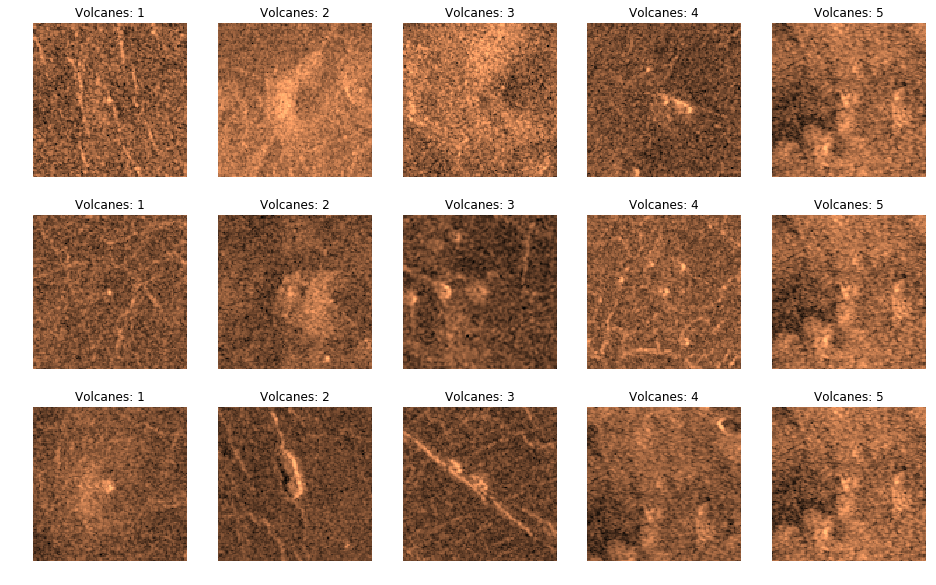

In [42]:
import matplotlib.pyplot as plt
f,axarr  = plt.subplots(3, 5, figsize=(16,10) )
for i in np.arange(1,6):
    aux = train_label_volcanoes["Number Volcanoes"] == i
    for j in range(3):
        images = X_train[aux]
        value = np.random.randint(0,len(images)-1) 
        axarr[j,i-1].imshow(images[value,:,:,0],cmap='copper')
        axarr[j,i-1].axis('off')
        axarr[j,i-1].set_title("Volcanes: "+str(i))
plt.show()

In [105]:
pooler = Sequential()
pooler.add(MaxPooling2D(3,3,input_shape=X_train.shape[1:]))
pooler.add(MaxPooling2D(3,3))
X_train_pooled = pooler.predict(X_train)
X_train_pooled.shape

(1000, 12, 12, 1)

In [ ]:
normalizar entrada

In [ ]:
X = X/255.0

### MODEL

In [381]:
from keras import backend as K
def myFunc(cube):
    #mejora
    #treshold = 1.0
    #aux = (K.relu(cube-treshold)+treshold)*0.5
    #return K.sum(cube,axis=(1,2,3)) #o
    #return K.sum(K.sum(K.sum(cube,axis=1),1),1)
    return int(cube.shape[1])*int(cube.shape[2])* K.mean(cube,axis=(1,2,3)) #o

In [388]:
from keras.layers import *
from keras.models import Model,Sequential

weight=regularizers.l2(0.0005)
aux = Sequential()
aux.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],kernel_regularizer=weight,activation='tanh'))
#aux.add(LeakyReLU(alpha=0.3))

aux.add(BatchNormalization())

aux.add(MaxPooling2D(2,2))

aux.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
#aux.add(LeakyReLU(alpha=0.3))
aux.add(BatchNormalization())

aux.add(MaxPooling2D(2,2)) 

#tercera capa
#aux.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
#aux.add(BatchNormalization())
#aux.add(MaxPooling2D(2,2)) 

#aux.add(BatchNormalization())
aux.add(Conv2D(1,(1,1),padding='same',activation='sigmoid',kernel_regularizer=weight))

#model.add(AveragePooling2D(2,2)) 

#aux.add(UpSampling2D((3,3)))
#aux.add(UpSampling2D((3,3)))

#esos 5 a 1...
cross=Lambda(myFunc,output_shape=(1,))(aux.output)   

model = Model(aux.input,cross)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_229_input (InputLayer (None, 110, 110, 1)       0         
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 110, 110, 32)      320       
_________________________________________________________________
batch_normalization_27 (Batc (None, 110, 110, 32)      128       
_________________________________________________________________
max_pooling2d_157 (MaxPoolin (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_230 (Conv2D)          (None, 55, 55, 64)        18496     
_________________________________________________________________
batch_normalization_28 (Batc (None, 55, 55, 64)        256       
_________________________________________________________________
max_pooling2d_158 (MaxPoolin (None, 27, 27, 64)        0         
__________

In [389]:
import keras
opt = keras.optimizers.SGD(lr=0.1, momentum=0.9)
model.compile( optimizer='adam', loss='mse') #mse
model.fit(X_train, y_train,batch_size=16,epochs=70,validation_data=(X_test, y_test),verbose=1)

Train on 1000 samples, validate on 434 samples
Epoch 1/70
1000/1000 [==============================] - 6s 6ms/step - loss: 454.5182 - val_loss: 30.1655
Epoch 2/70
1000/1000 [==============================] - 2s 2ms/step - loss: 10.4404 - val_loss: 6.0497
Epoch 3/70
1000/1000 [==============================] - 2s 2ms/step - loss: 5.3837 - val_loss: 4.0584
Epoch 4/70
1000/1000 [==============================] - 2s 2ms/step - loss: 3.4063 - val_loss: 3.4591
Epoch 5/70
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2927 - val_loss: 2.6212
Epoch 6/70
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7916 - val_loss: 2.2924
Epoch 7/70
1000/1000 [==============================] - 2s 2ms/step - loss: 1.4821 - val_loss: 1.7849
Epoch 8/70
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1539 - val_loss: 1.5308
Epoch 9/70
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0423 - val_loss: 1.7103
Epoch 10/70
1000/1000 [========

KeyboardInterrupt: 

In [118]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=True) # randomly flip images
datagen.fit(X_train)
batch_size = 16
model.fit_generator(datagen.flow(X_train, y_train,batch_size=batch_size),steps_per_epoch=X_train.shape[0]// batch_size, epochs=40,validation_data=(X_test, y_test))

Epoch 1/40
62/62 [==============================] - 2s 37ms/step - loss: 0.4149 - val_loss: 1.1114
Epoch 2/40
62/62 [==============================] - 2s 36ms/step - loss: 0.4097 - val_loss: 0.2942
Epoch 3/40
62/62 [==============================] - 2s 36ms/step - loss: 0.4035 - val_loss: 0.2983
Epoch 4/40
62/62 [==============================] - 2s 36ms/step - loss: 0.4178 - val_loss: 0.3178
Epoch 5/40
62/62 [==============================] - 2s 36ms/step - loss: 0.4347 - val_loss: 0.3083
Epoch 6/40
62/62 [==============================] - 2s 36ms/step - loss: 0.4013 - val_loss: 0.2946
Epoch 7/40
62/62 [==============================] - 2s 35ms/step - loss: 0.3866 - val_loss: 0.3242
Epoch 8/40
62/62 [==============================] - 2s 35ms/step - loss: 0.4137 - val_loss: 0.3053
Epoch 9/40
62/62 [==============================] - 2s 35ms/step - loss: 0.3896 - val_loss: 0.5539
Epoch 10/40
62/62 [==============================] - 2s 34ms/step - loss: 0.4008 - val_loss: 0.3594
Epoch 11/

## PROBANDO

In [397]:
from keras.layers import *
from keras.models import Model,Sequential

weight=regularizers.l2(0.0005)
aux = Sequential()
aux.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],kernel_regularizer=weight,activation='tanh'))
aux.add(BatchNormalization())
aux.add(MaxPooling2D(2,2))

aux.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
aux.add(BatchNormalization())
aux.add(MaxPooling2D(2,2)) 

#tercera capa
#aux.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
#aux.add(BatchNormalization())
#aux.add(MaxPooling2D(2,2)) 

aux.add(Conv2D(1,(1,1),padding='same',activation='sigmoid',kernel_regularizer=weight))

#esos 5 a 1...
cross=Lambda(myFunc,output_shape=(1,))(aux.output)   
model = Model(aux.input,cross)

model.compile( optimizer='adam', loss='mse') #mse
model.fit(X_train, y_train,batch_size=16,epochs=150,validation_data=(X_test, y_test),verbose=1)

Train on 1000 samples, validate on 434 samples
Epoch 1/150
1000/1000 [==============================] - 6s 6ms/step - loss: 4256.8227 - val_loss: 1821.1340
Epoch 2/150
1000/1000 [==============================] - 2s 2ms/step - loss: 133.3569 - val_loss: 330.9334
Epoch 3/150
1000/1000 [==============================] - 2s 2ms/step - loss: 66.2920 - val_loss: 133.1243
Epoch 4/150
1000/1000 [==============================] - 2s 2ms/step - loss: 46.8039 - val_loss: 71.2276
Epoch 5/150
1000/1000 [==============================] - 2s 2ms/step - loss: 35.7249 - val_loss: 64.7416
Epoch 6/150
1000/1000 [==============================] - 2s 2ms/step - loss: 28.3278 - val_loss: 35.3273
Epoch 7/150
1000/1000 [==============================] - 2s 2ms/step - loss: 22.4446 - val_loss: 31.7169
Epoch 8/150
1000/1000 [==============================] - 2s 2ms/step - loss: 18.0159 - val_loss: 34.0961
Epoch 9/150
1000/1000 [==============================] - 2s 2ms/step - loss: 15.5570 - val_loss: 16.3128
E

1000/1000 [==============================] - 2s 2ms/step - loss: 0.3936 - val_loss: 0.2917
Epoch 80/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3902 - val_loss: 0.3250
Epoch 81/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4192 - val_loss: 0.2960
Epoch 82/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3955 - val_loss: 0.2832
Epoch 83/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3901 - val_loss: 0.2931
Epoch 84/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4077 - val_loss: 0.2927
Epoch 85/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3917 - val_loss: 0.2882
Epoch 86/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3998 - val_loss: 0.2880
Epoch 87/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3907 - val_loss: 0.2802
Epoch 88/150
1000/1000 [==============================] - 2s 2ms/step - loss:

In [398]:
weight=regularizers.l2(0.0005)
aux = Sequential()
aux.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],kernel_regularizer=weight,activation='tanh'))
aux.add(BatchNormalization())
aux.add(MaxPooling2D(3,3))

aux.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
aux.add(BatchNormalization())
aux.add(MaxPooling2D(3,3)) 

#tercera capa
#aux.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
#aux.add(BatchNormalization())
#aux.add(MaxPooling2D(2,2)) 

aux.add(Conv2D(1,(1,1),padding='same',activation='sigmoid',kernel_regularizer=weight))

#esos 5 a 1...
cross=Lambda(myFunc,output_shape=(1,))(aux.output)   
model = Model(aux.input,cross)

model.compile( optimizer='adam', loss='mse') #mse
model.fit(X_train, y_train,batch_size=16,epochs=150,validation_data=(X_test, y_test),verbose=1)

Train on 1000 samples, validate on 434 samples
Epoch 1/150
1000/1000 [==============================] - 6s 6ms/step - loss: 21.1816 - val_loss: 4.6833
Epoch 2/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6172 - val_loss: 0.4414
Epoch 3/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5833 - val_loss: 0.4176
Epoch 4/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5309 - val_loss: 0.4458
Epoch 5/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5131 - val_loss: 0.4651
Epoch 6/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4959 - val_loss: 0.4503
Epoch 7/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5010 - val_loss: 0.4249
Epoch 8/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4985 - val_loss: 0.4423
Epoch 9/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4817 - val_loss: 0.4359
Epoch 10/150
1000/1000 [=

In [399]:
weight=regularizers.l2(0.0005)
aux = Sequential()
aux.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],kernel_regularizer=weight,activation='tanh'))
aux.add(BatchNormalization())
aux.add(MaxPooling2D(2,2))

aux.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
aux.add(BatchNormalization())
aux.add(MaxPooling2D(2,2)) 

#tercera capa
aux.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
aux.add(BatchNormalization())
aux.add(MaxPooling2D(2,2)) 

aux.add(Conv2D(1,(1,1),padding='same',activation='sigmoid',kernel_regularizer=weight))

#esos 5 a 1...
cross=Lambda(myFunc,output_shape=(1,))(aux.output)   
model = Model(aux.input,cross)

model.compile( optimizer='adam', loss='mse') #mse
model.fit(X_train, y_train,batch_size=16,epochs=150,validation_data=(X_test, y_test),verbose=1)

Train on 1000 samples, validate on 434 samples
Epoch 1/150
1000/1000 [==============================] - 7s 7ms/step - loss: 399.7083 - val_loss: 5.0877
Epoch 2/150
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7101 - val_loss: 2.4987
Epoch 3/150
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0805 - val_loss: 2.2908
Epoch 4/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7758 - val_loss: 1.3198
Epoch 5/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6190 - val_loss: 0.8961
Epoch 6/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6149 - val_loss: 0.7426
Epoch 7/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5322 - val_loss: 0.6089
Epoch 8/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5329 - val_loss: 0.6100
Epoch 9/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4978 - val_loss: 0.5118
Epoch 10/150
1000/1000 [

In [404]:
weight=regularizers.l2(0.0005)
aux = Sequential()
aux.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],kernel_regularizer=weight,activation='tanh'))
aux.add(BatchNormalization())
aux.add(MaxPooling2D(2,2))

aux.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
aux.add(BatchNormalization())
aux.add(MaxPooling2D(2,2)) 

aux.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
aux.add(BatchNormalization())
aux.add(MaxPooling2D(2,2)) 

aux.add(Conv2D(256,(3,3),padding='same',kernel_regularizer=weight,activation='tanh')) 
aux.add(BatchNormalization())
aux.add(MaxPooling2D(2,2))

aux.add(Conv2D(1,(1,1),padding='same',activation='sigmoid',kernel_regularizer=weight))

#esos 5 a 1...
cross=Lambda(myFunc,output_shape=(1,))(aux.output)   
model = Model(aux.input,cross)

model.compile( optimizer='adam', loss='mse') #mse
model.fit(X_train, y_train,batch_size=16,epochs=150,validation_data=(X_test, y_test),verbose=1)

Train on 1000 samples, validate on 434 samples
Epoch 1/150
1000/1000 [==============================] - 8s 8ms/step - loss: 13.8937 - val_loss: 0.7273
Epoch 2/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6066 - val_loss: 0.6059
Epoch 3/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5295 - val_loss: 0.4358
Epoch 4/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5485 - val_loss: 0.4178
Epoch 5/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5247 - val_loss: 0.4727
Epoch 6/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5275 - val_loss: 0.4491
Epoch 7/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5067 - val_loss: 0.4400
Epoch 8/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5037 - val_loss: 0.4085
Epoch 9/150
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4851 - val_loss: 0.3874
Epoch 10/150
1000/1000 [=

In [405]:
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output = intermediate_layer_model.predict(X_test[:100])
intermediate_output.shape

(100, 6, 6, 1)

Imagen real
Salida penultima capa


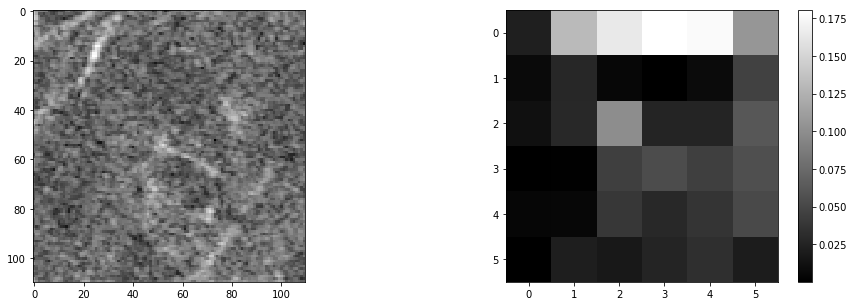

Imagen real
Salida penultima capa


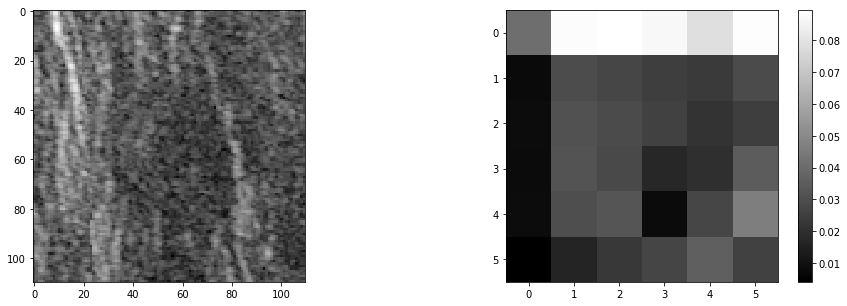

Imagen real
Salida penultima capa


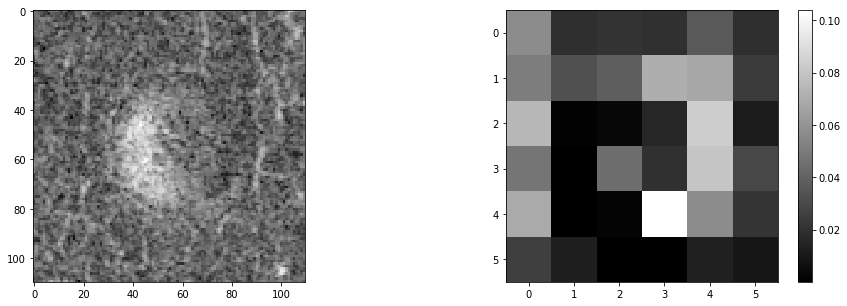

Imagen real
Salida penultima capa


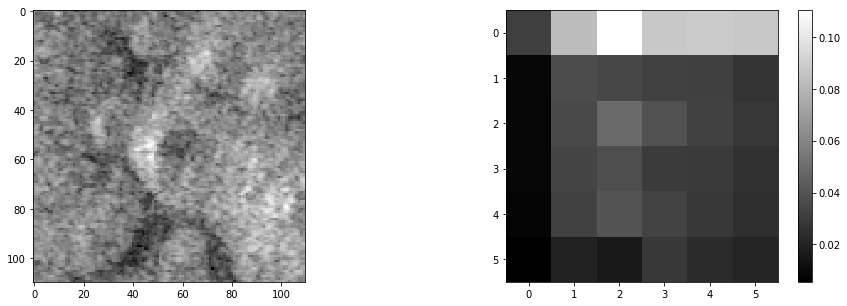

Imagen real
Salida penultima capa


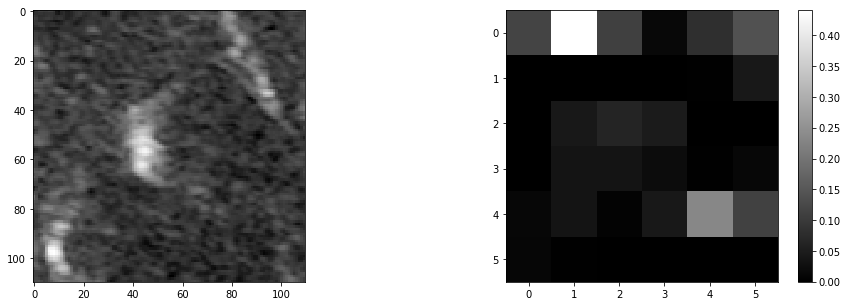

In [406]:
n = 5
import matplotlib.pyplot as plt
for j in range(n):
    i = np.random.randint(0,100)
    print "Imagen real"
    f,ax = plt.subplots(1,2,figsize=(16, 5))
    ax[0].imshow(X_test[i,:,:,0],cmap='gray')

    print "Salida penultima capa"
    ima = intermediate_output[i]
    aux = ax[1].imshow(ima[:,:,0],cmap='gray')
    plt.colorbar(aux)

    plt.show()

In [364]:
def quantity(x):
    return K.sum(K.relu(K.sign(x-0.5)),axis=(1,2,3))#     return K.sum(cube) #o


final=Lambda(quantity,output_shape=(1,))(model.layers[-2].output)   


quantity_model = Model(inputs=model.input,
                                 outputs=final)
quantity_output = quantity_model.predict(X_test[:100])
quantity_output

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [407]:
model.predict(X_test)[:100]

array([1.19, 1.5 , 1.31, 1.2 , 1.12, 1.2 , 1.2 , 1.3 , 1.18, 1.22, 1.12,
       1.27, 1.21, 1.31, 1.27, 1.06, 1.16, 1.18, 1.4 , 1.21, 1.08, 1.1 ,
       1.19, 1.42, 1.39, 1.33, 1.06, 1.31, 1.23, 1.28, 1.27, 1.18, 1.14,
       1.16, 1.19, 1.31, 1.67, 1.21, 1.21, 1.26, 1.48, 1.23, 1.32, 1.34,
       1.14, 1.28, 1.2 , 1.15, 0.92, 1.22, 1.11, 1.27, 1.13, 1.24, 1.24,
       1.23, 1.31, 1.16, 1.37, 1.68, 1.25, 1.23, 1.24, 1.2 , 1.45, 1.19,
       1.38, 1.18, 1.33, 1.15, 1.53, 1.16, 1.12, 1.26, 1.24, 1.31, 1.4 ,
       1.12, 1.73, 1.17, 1.34, 1.42, 1.34, 1.21, 1.17, 1.2 , 1.4 , 1.24,
       1.2 , 1.21, 1.62, 1.29, 1.23, 1.2 , 0.89, 1.19, 1.2 , 0.99, 1.34,
       1.61], dtype=float32)

In [408]:
ytest_hat = np.round(model.predict(X_test))
ytest_hat

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [394]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

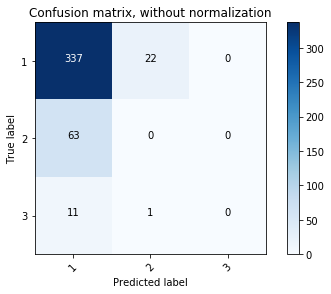

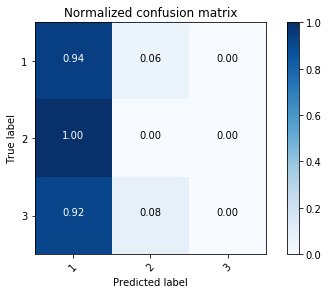

In [409]:
label_names = ["1","2","3"]
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, ytest_hat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()